<a href="https://colab.research.google.com/github/Anidafio/4105_hw4/blob/main/hw4_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use the URL for the raw CSV data
url = 'https://raw.githubusercontent.com/Anidafio/4105_hw4/main/cancer.csv'

cancer = pd.read_csv(url)
#cancer.head()

In [12]:
#map data
def binary_map(x):
    return x.map({'B': 1, 'M': 0})

cancer[['diagnosis']] = cancer[['diagnosis']].apply(binary_map)

X = cancer.iloc[:, 2:32].values
Y = cancer.iloc[:, 1].values

#split train and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#standard scaler
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Optimum number of principal components (k): 28


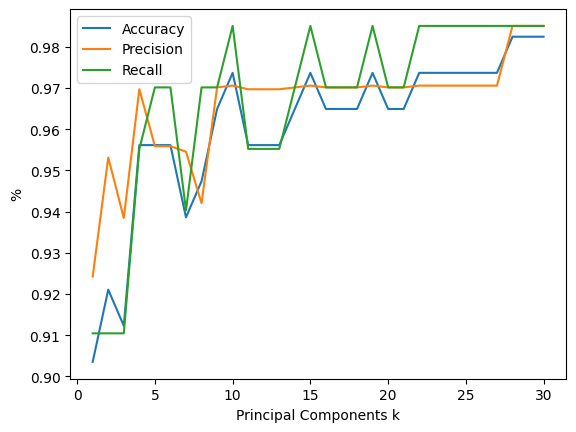

In [13]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

k_vals = np.arange(1, X_train.shape[1] + 1)

accuracy_scores = []
precision_scores = []
recall_scores = []

for k in k_vals:
  #pca
  pca = PCA(n_components = k)
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)

  #svm model
  svm_model = SVC(kernel='linear')
  svm_model.fit(X_train_pca, Y_train)

  #predict
  Y_pred = svm_model.predict(X_test_pca)

  #scores
  accuracy = accuracy_score(Y_test, Y_pred)
  precision = precision_score(Y_test, Y_pred)
  recall = recall_score(Y_test, Y_pred)

  accuracy_scores.append(accuracy)
  precision_scores.append(precision)
  recall_scores.append(recall)

# optimum number of principal components (k)
optimal_k = k_vals[np.argmax(accuracy_scores)]
print("Optimum number of principal components (k):", optimal_k)

# plot
plt.plot(k_vals, accuracy_scores, label='Accuracy')
plt.plot(k_vals, precision_scores, label='Precision')
plt.plot(k_vals, recall_scores, label='Recall')
plt.xlabel('Principal Components k')
plt.ylabel('%')
plt.legend()
plt.show()

In [14]:
#pca
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_pca, Y_train)
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train_pca, Y_train)
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_pca, Y_train)
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train_pca, Y_train)

Y_pred = svm_linear.predict(X_test_pca)
accuracy_linear = accuracy_score(Y_test, Y_pred)
Y_pred = svm_poly.predict(X_test_pca)
accuracy_poly = accuracy_score(Y_test, Y_pred)
Y_pred = svm_rbf.predict(X_test_pca)
accuracy_rbf = accuracy_score(Y_test, Y_pred)
Y_pred = svm_sigmoid.predict(X_test_pca)
accuracy_sigmoid = accuracy_score(Y_test, Y_pred)

print("accuracy linear:", accuracy_linear)
print("accuracy poly:", accuracy_poly)
print("accuracy rbf:", accuracy_rbf)
print("accuracy sigmoid:", accuracy_sigmoid)

accuracy linear: 0.9210526315789473
accuracy poly: 0.8947368421052632
accuracy rbf: 0.8947368421052632
accuracy sigmoid: 0.8508771929824561


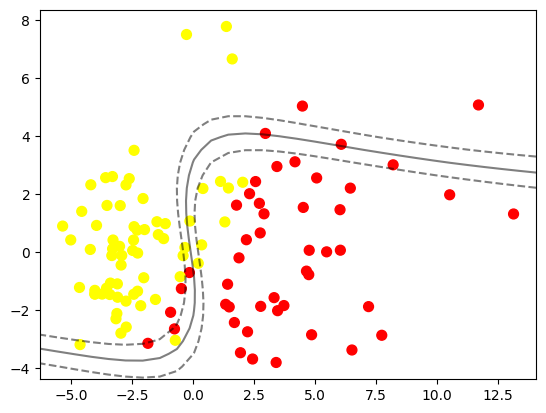

In [15]:

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test, s=50, cmap='autumn');
plot_svc_decision_function(svm_sigmoid)